Zad2

In [ ]:
#data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [7]:
#standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
#model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation="sigmoid")
    ]
)

c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
#training
model.fit(X_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0214 
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0292 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9940 - loss: 0.0243 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9897 - loss: 0.0304 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9945 - loss: 0.0283 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9959 - loss: 0.0213 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0256 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9957 - loss: 0.0228 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.0212 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9957 - loss: 0.0197 


In [16]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Dokładność: {accuracy:.4f}")
print(f"Precyzja: {precision:.4f}")
print(f"Czułość: {recall:.4f}")
print("Macierz pomyłek:")
print(cm)


Dokładność: 0.9825
Precyzja: 0.9859
Czułość (Recall): 0.9859
Macierz pomyłek:
[[42  1]
 [ 1 70]]


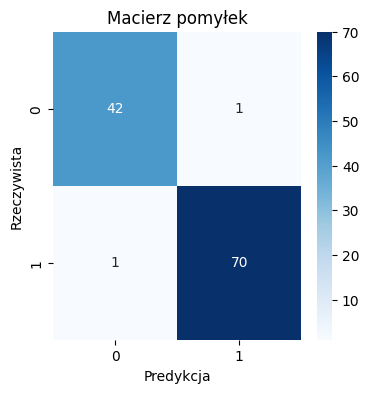

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista")
plt.title("Macierz pomyłek")
plt.show()


Zad3

In [73]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
model = keras.Sequential(
    [
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'), 
    layers.Dense(3, activation='softmax')
    ]
)

c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [76]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=8
)


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2588 - loss: 1.2638 - val_accuracy: 0.3667 - val_loss: 1.1238
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4168 - loss: 1.0469 - val_accuracy: 0.3667 - val_loss: 0.9597
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5912 - loss: 0.8935 - val_accuracy: 0.5333 - val_loss: 0.8248
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6137 - loss: 0.8247 - val_accuracy: 0.7667 - val_loss: 0.7250
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6206 - loss: 0.7600 - val_accuracy: 0.7333 - val_loss: 0.6497
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7664 - loss: 0.6739 - val_accuracy: 0.7667 - val_loss: 0.5911
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7563 - loss: 0.6080 - val_accuracy: 0.8000 - val_loss: 0.5468
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7236 - loss: 0.5827 - val_accuracy: 0.8000 - val_loss

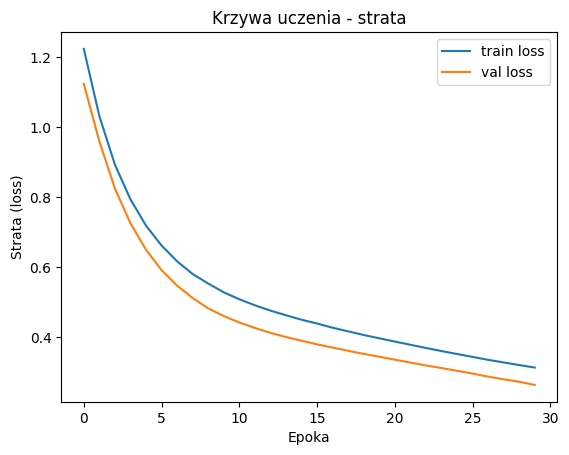

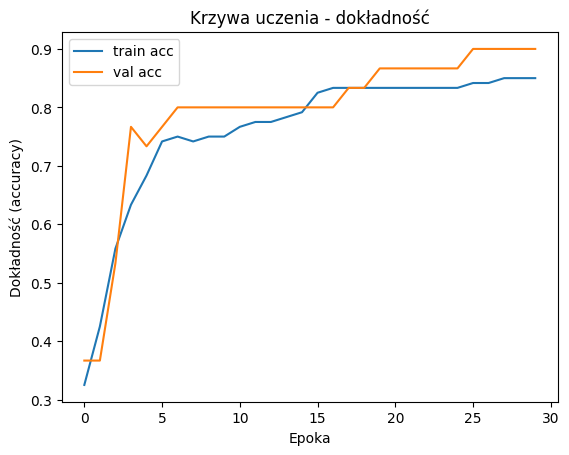

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoka')
plt.ylabel('Strata ')
plt.legend()
plt.title('Krzywa uczenia strata')
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoka')
plt.ylabel('Dokładność ')
plt.legend()
plt.title('Krzywa uczenia  dokładność')
plt.show()

In [78]:
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [80]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


<function matplotlib.pyplot.show(close=None, block=None)>

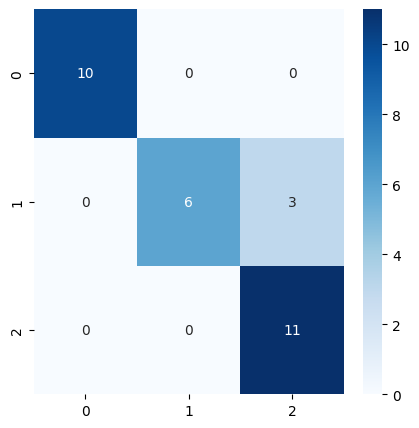

In [81]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show

Zad4/Zad6 datasety ważą 50gb/25gb nie dam rade tego zrobic na moim sprzęcie


Zad4

In [ ]:
import os
import json
import numpy as np
from collections import Counter
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

dataset_dir = "C:/Studia/4 semestr/mnbd/lista10/tiny-coco/small_coco"
img_dir = os.path.join(dataset_dir, "train_2017_small")
ann_path = os.path.join(dataset_dir, "instances_train2017_small.json")

with open(ann_path, "r") as f:
    coco = json.load(f)

id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

cat_id_to_name = {cat["id"]: cat["name"] for cat in coco["categories"]}
cat_ids = sorted(list(cat_id_to_name.keys()))
cat_id_to_index = {cat_id: idx for idx, cat_id in enumerate(cat_ids)}


img_annots = {}
for ann in coco["annotations"]:
    img_id = ann["image_id"]
    cat_id = ann["category_id"]
    if img_id not in img_annots:
        img_annots[img_id] = []
    img_annots[img_id].append(cat_id)

file_class_list = []
for img_id, cats in img_annots.items():
    file_name = id_to_file[img_id]
    most_common_cat = Counter(cats).most_common(1)[0][0]
    class_idx = cat_id_to_index[most_common_cat]
    file_class_list.append((file_name, class_idx))

In [ ]:

X = []
y = []
for file_name, class_idx in file_class_list:
    img_path = os.path.join(img_dir, file_name)
    try:
        img = Image.open(img_path).convert('RGB').resize((64, 64))
        X.appbend(np.array(img).flatten())
        y.append(class_idx)
    except Exception as e:
        print(f"Błąd z plikiem {img_path}: {e}")

X = np.array(X)
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (16, 12288)
y shape: (16,)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(cat_ids), activation="softmax")
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 202.7288 - val_accuracy: 0.0000e+00 - val_loss: 715.0079
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1667 - loss: 751.9543 - val_accuracy: 0.0000e+00 - val_loss: 598.3856
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.0833 - loss: 369.8330 - val_accuracy: 0.0000e+00 - val_loss: 405.9991
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.0833 - loss: 259.7769 - val_accuracy: 0.0000e+00 - val_loss: 250.9484
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.0000e+00 - loss: 160.2002 - val_accuracy: 0.0000e+00 - val_loss: 163.8509
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.0000e+00 - loss: 135.8982 - val_accuracy: 0.0000e+00 - val_loss: 101.5468
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.0833 - loss: 65.6816 - val_accuracy: 0.0000e+00 - val_loss: 18.6533
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - acc

In [ ]:

y_pred_proba = model.predict(X_test)  
y_pred = np.argmax(y_pred_proba, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [ ]:
from tensorflow.keras.utils import to_categorical

y_test_cat = to_categorical(y_test, num_classes=len(cat_ids))


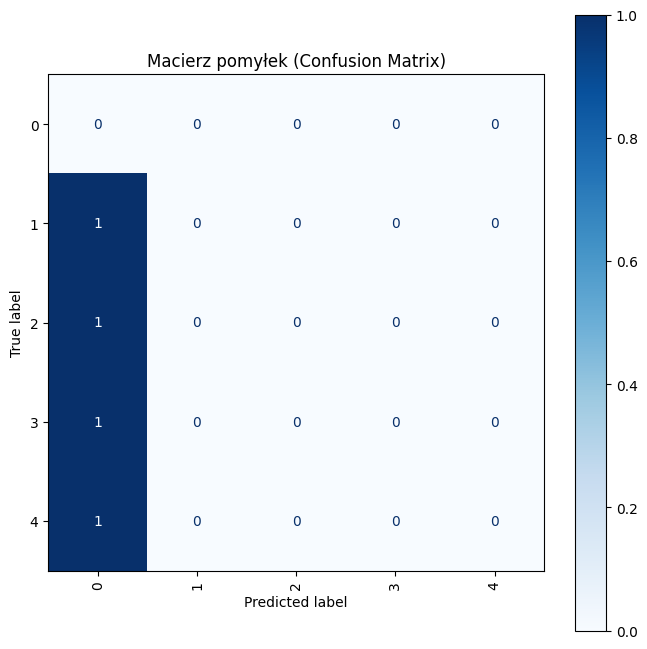

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.show()


c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


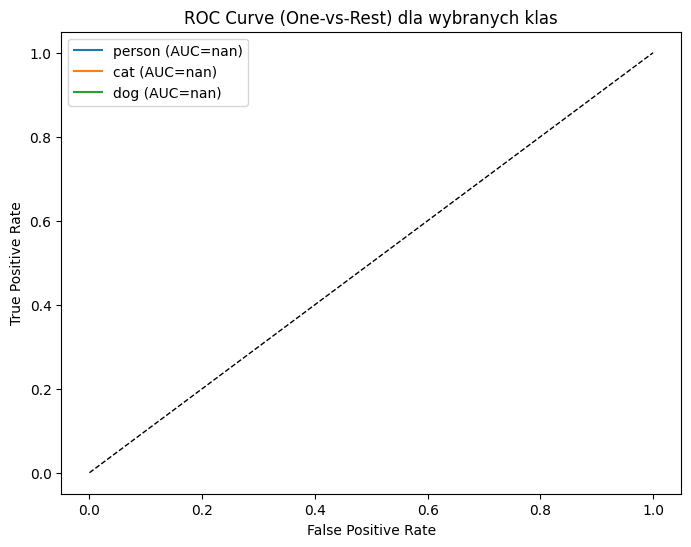

In [28]:
selected_class_names = ["person", "dog", "cat"]
selected_class_ids = [cid for cid, name in cat_id_to_name.items() if name in selected_class_names]

selected_indices = [cat_ids.index(cid) for cid in selected_class_ids]

plt.figure(figsize=(8, 6))
for idx in selected_indices:
    fpr, tpr, _ = roc_curve(y_test_cat[:, idx], y_pred_proba[:, idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cat_id_to_name[cat_ids[idx]]} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest) dla wybranych klas')
plt.legend()
plt.show()


In [19]:
# ─── CELL 2: Ściągnięcie coco128 z Kaggle (jak wcześniej) ───────────────────────
import kagglehub
from pathlib import Path

path = kagglehub.dataset_download("ultralytics/coco128")
DATA_DIR = Path(path)  # to jest katalog coco128
print("Dataset znajduje się w:", DATA_DIR)


Dataset znajduje się w: C:\Users\micha\.cache\kagglehub\datasets\ultralytics\coco128\versions\3
